In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

### Section 1: Data Loading and Exploration
In this section, we import necessary libraries and load the dataset. We perform initial checks to confirm the data is correctly loaded, inspecting for missing values or potential issues. The commands `df.info()` and `df.describe()` help us understand the data types and key statistics of numerical features.

In [2]:
# Load the dataset
try:
    df = pd.read_csv('/content/house_price_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'house_price_data.csv' was not found.")
    print("Please upload the file to your Colab environment and try again.")
    exit()

# Dataset information
df.info()

# Display first 5 rows
df.head()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-null   int64  


,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,floors,garage,garden,basement,balcony,air_conditioning,parking_spaces,listing_duration,year_sold,sale_price
count,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3.785213,337.536250,148.724875,1.0,14.295125,150.608125,3.359500,2.502875,1.808250,0.698000,0.598875,0.389625,0.504375,0.40050,1.400375,29.411625,2021.591625,725.181400
std,3.953137,350.469891,165.435271,0.0,14.677669,83.534599,1.129345,0.802074,0.600231,0.459154,0.490157,0.487696,0.500012,0.49003,0.922730,29.499529,1.065597,350.856932
min,0.500000,50.000000,30.000000,1.0,0.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2020.000000,80.000000
25%,1.000000,94.750000,35.000000,1.0,4.000000,86.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,8.000000,2021.000000,416.375000
50%,2.500000,221.000000,90.000000,1.0,10.000000,134.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,20.000000,2022.000000,684.600000
75%,5.100000,455.000000,194.000000,1.0,20.000000,196.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,42.000000,2022.000000,1108.375000
max,25.000000,3000.000000,1748.000000,1.0,100.000000,500.000000,6.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,200.000000,2023.000000,1200.000000


### Section 2: Exploratory Data Analysis (EDA)
This section uses visualizations to explore the dataset. We examine the distribution of the sale price, study relationships between features and the target variable, and analyze potential multicollinearity among numerical features using a correlation heatmap.

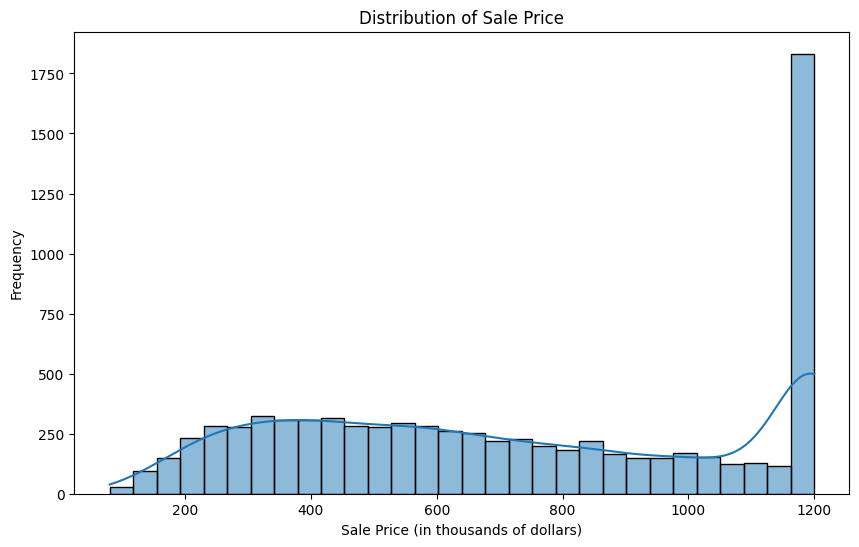

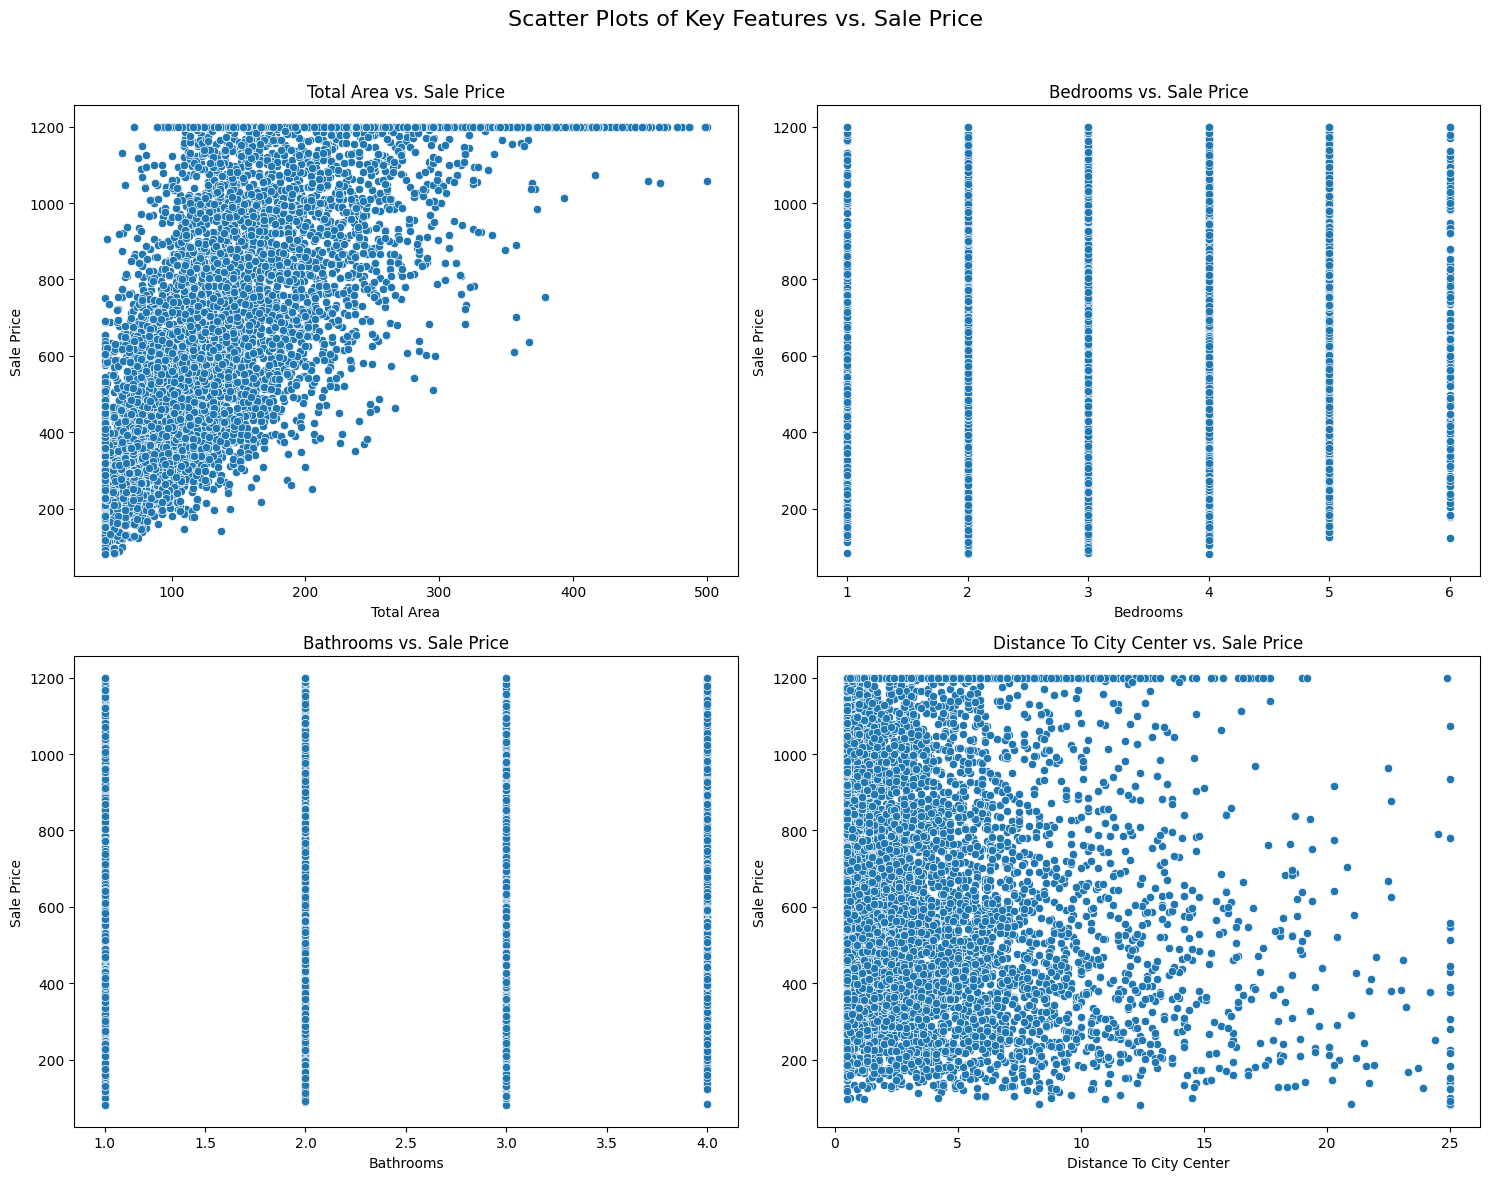

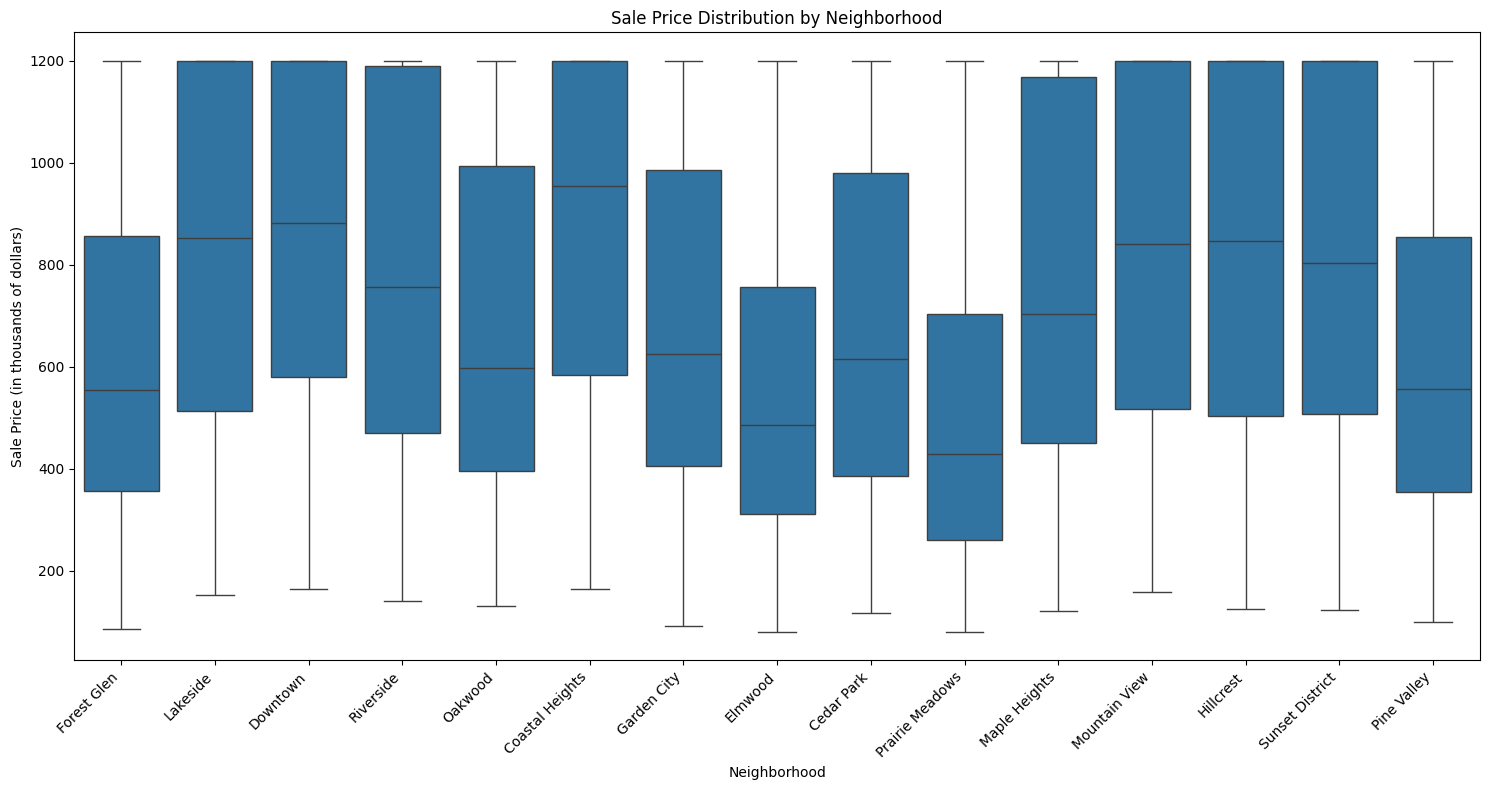

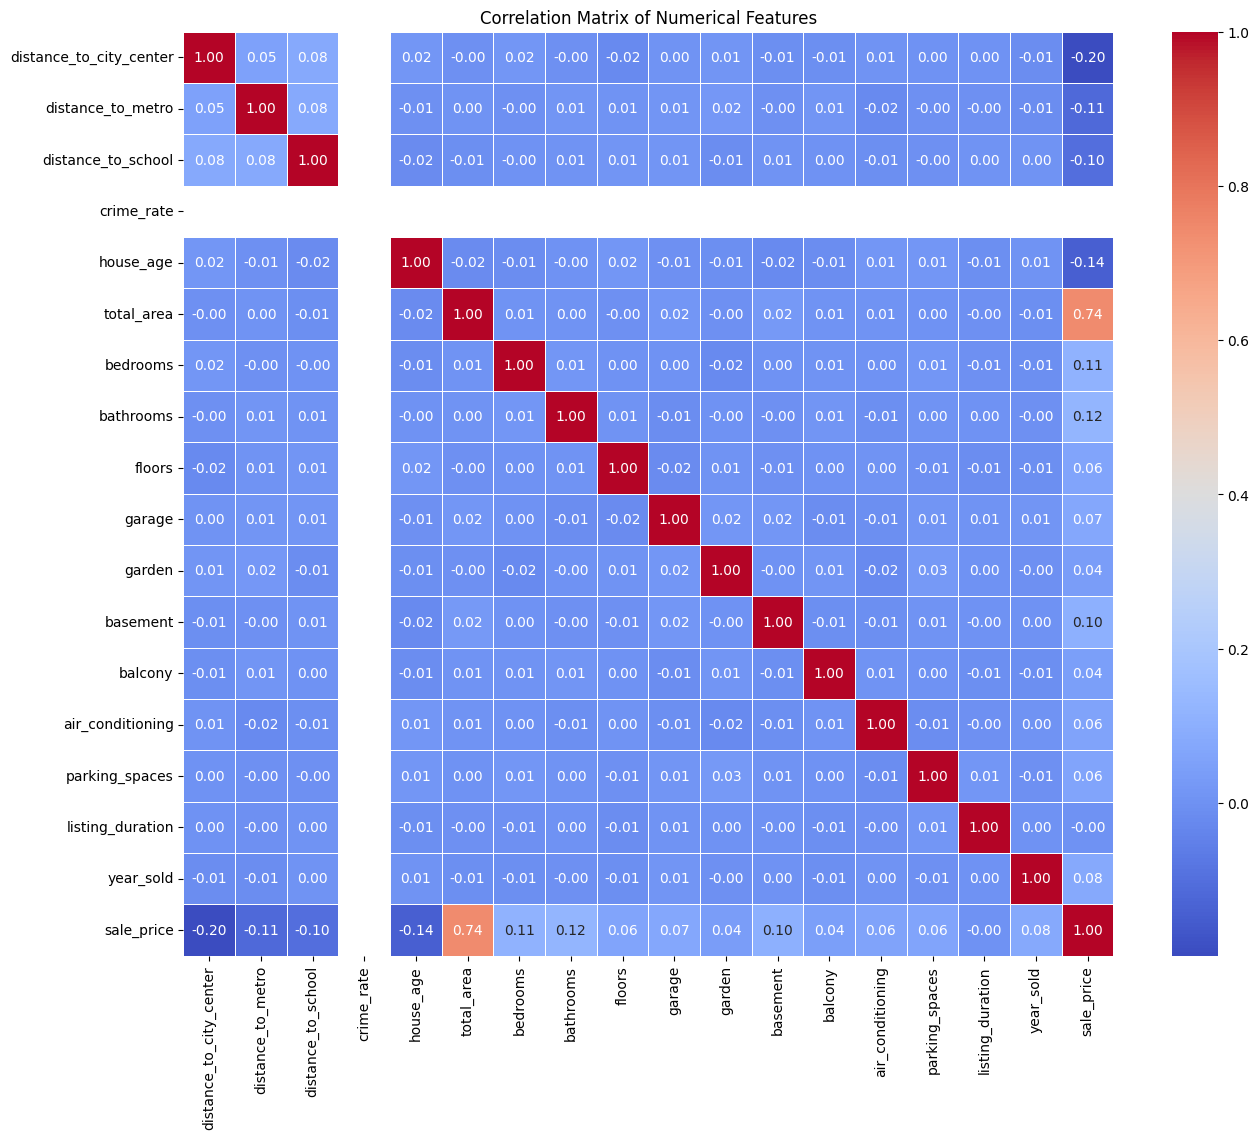

In [3]:
# Distribution of the target variable 'sale_price'
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price (in thousands of dollars)')
plt.ylabel('Frequency')
plt.show()

# Scatter plots between key numerical features and sale price
numerical_features = ['total_area', 'bedrooms', 'bathrooms', 'distance_to_city_center']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Scatter Plots of Key Features vs. Sale Price', fontsize=16)
for i, feature in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]
    sns.scatterplot(x=df[feature], y=df['sale_price'], ax=ax)
    ax.set_title(f'{feature.replace('_', ' ').title()} vs. Sale Price')
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Sale Price')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plot of sale price by neighborhood
plt.figure(figsize=(15, 8))
sns.boxplot(x='neighborhood', y='sale_price', data=df)
plt.title('Sale Price Distribution by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price (in thousands of dollars)')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap for numerical features
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Section 3: Feature Engineering and Preprocessing
This section preprocesses data for modeling. It converts categorical variables to numerical via one-hot encoding. The dataset is then split into training and testing subsets to enable unbiased model evaluation.

In [4]:
# One-hot encoding for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('property_id')  # Exclude ID column from encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_processed.drop(['property_id', 'sale_price'], axis=1)
y = df_processed['sale_price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 6400 samples
Testing set size: 1600 samples


### Section 4: Model Development
Here, a Linear Regression model is created and trained using the training data. The model captures the relationships between features and the target.

In [5]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print('Linear Regression model training complete.')

Linear Regression model training complete.


### Section 5: Model Evaluation
The model's performance is evaluated on the test set by calculating key metrics such as MAE, MSE, RMSE, and R-squared. A residual plot is also generated to inspect the model's prediction errors visually.

Mean Absolute Error (MAE): 111.11
Mean Squared Error (MSE): 20388.47
Root Mean Squared Error (RMSE): 142.79
R-squared (R²): 0.83


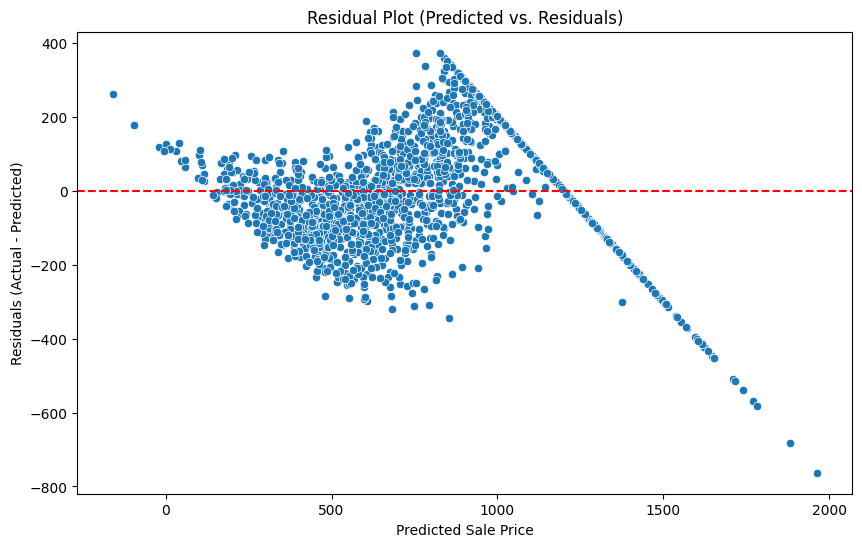

Model validation concluded. Metrics provide insights on accuracy, and residual plot reveals error distribution.


In [6]:
# Predictions on test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Predicted vs. Residuals)')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

print('Model validation concluded. Metrics provide insights on accuracy, and residual plot reveals error distribution.')